Goal: The primary goal of this project is to visually chart the evolution of body position values throughout the pitching sequence, with a specific focus on the fastest pitch achieved. This involves creating two distinct graphs—one highlighting arm positions and the other detailing torso and lower body positions—allowing us to gain insights into the temporal dynamics of body movements during the pitching action.

Outcome: Through this analysis, we've observed that to maximize power, the arm tends to rotate further and more quickly than the torso and lower body. These findings underscore the importance of coordinated body segment interactions in optimizing pitching mechanics and enhancing performance.  This seems to help us understand that to create more force, the arm has to rotate further than the torso and lower body have to.

In [23]:
#Upper Body




In [14]:
import pandas as pd

# Load the "poi_metrics.csv" and "joint_angles.csv" datasets
poi_metrics = pd.read_csv("poi_metrics.csv")
joint_angles = pd.read_csv("joint_angles.csv")

# Merge only the "pitch_speed_mph" column from "poi_metrics.csv" to "joint_angles.csv"
merged_data = joint_angles.merge(poi_metrics[['session_pitch', 'pitch_speed_mph']], on="session_pitch", how="inner")

merged_data


,session_pitch,time,rear_ankle_angle_x,rear_ankle_angle_y,rear_ankle_angle_z,elbow_angle_x,elbow_angle_y,elbow_angle_z,rear_hip_angle_x,rear_hip_angle_y,...,torso_pelvis_angle_x,torso_pelvis_angle_y,torso_pelvis_angle_z,pkh_time,fp_10_time,fp_100_time,MER_time,BR_time,MIR_time,pitch_speed_mph
0,1031_2,0.0000,102.3377,24.2866,3.0583,98.5992,0.0,30.0717,-25.8661,-1.2451,...,4.5245,-0.4548,0.8562,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,90.4
1,1031_2,0.0028,102.4702,24.3040,3.1173,98.2178,0.0,31.4800,-26.0253,-1.4272,...,4.5859,-0.4455,0.8704,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,90.4
2,1031_2,0.0056,102.5925,24.3088,3.1824,97.8532,0.0,32.8288,-26.1840,-1.5995,...,4.6484,-0.4360,0.8849,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,90.4
3,1031_2,0.0083,102.6985,24.2957,3.2527,97.5209,0.0,34.0643,-26.3384,-1.7540,...,4.7113,-0.4266,0.8998,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,90.4
4,1031_2,0.0111,102.7835,24.2602,3.3269,97.2333,0.0,35.1428,-26.4854,-1.8843,...,4.7737,-0.4178,0.9152,0.625,1.1806,1.1917,1.3056,1.3389,1.3778,90.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247704,3252_5,1.7528,62.0151,-6.3353,28.6913,35.4552,0.0,50.4741,2.9237,-2.4400,...,4.2283,21.6077,-33.3255,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,81.2
247705,3252_5,1.7556,61.9777,-6.1501,28.5725,35.7032,0.0,50.4431,3.0271,-2.3713,...,4.2786,21.5348,-33.4143,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,81.2
247706,3252_5,1.7583,61.9537,-6.0254,28.4939,35.8753,0.0,50.4071,3.0944,-2.3257,...,4.3129,21.4848,-33.4732,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,81.2
247707,3252_5,1.7611,61.9396,-5.9482,28.4459,35.9849,0.0,50.3766,3.1349,-2.2979,...,4.3343,21.4533,-33.5093,0.800,1.4139,1.4278,1.5500,1.5778,1.6139,81.2


In [15]:
import pandas as pd

# Create a new DataFrame with the desired transformations
new_data = pd.DataFrame()

# Extract the corresponding time values
new_data['time'] = merged_data['time']

# Calculate and rename the columns as requested
new_data['elbow_flexion'] = merged_data['elbow_angle_x'].apply(lambda x: max(0, x))
new_data['wrist_extension'] = merged_data['wrist_angle_x'].apply(lambda x: max(0, x))
new_data['shoulder_ext_rotation'] = merged_data['shoulder_angle_z'].apply(lambda x: max(0, x))
new_data['shoulder_abduction'] = merged_data['shoulder_angle_x'].apply(lambda x: abs(min(0, x)))

# Now, "new_data" contains the transformed and renamed columns
# You can use this DataFrame for further analysis
new_data

,time,elbow_flexion,wrist_extension,shoulder_ext_rotation,shoulder_abduction
0,0.0000,98.5992,38.1742,0.0000,0.0000
1,0.0028,98.2178,34.3073,0.0000,0.0000
2,0.0056,97.8532,30.6142,0.0000,0.0000
3,0.0083,97.5209,27.2491,0.0000,0.0000
4,0.0111,97.2333,24.3383,0.0000,0.0000
...,...,...,...,...,...
247704,1.7528,35.4552,0.0000,61.5523,151.7731
247705,1.7556,35.7032,0.0000,61.7321,152.1348
247706,1.7583,35.8753,0.0000,61.8392,152.3678
247707,1.7611,35.9849,0.0000,61.8976,152.5066


In [16]:
import pandas as pd

# Create a new DataFrame with the desired transformations
new_data = pd.DataFrame()

# Extract the corresponding time values
new_data['time'] = merged_data['time']

# Add the "pitch_speed_mph" field from the "merged_data" DataFrame
new_data['pitch_speed_mph'] = merged_data['pitch_speed_mph']

# Calculate and rename the columns as requested
new_data['elbow_flexion'] = merged_data['elbow_angle_x'].apply(lambda x: max(0, x))
new_data['wrist_extension'] = merged_data['wrist_angle_x'].apply(lambda x: max(0, x))
new_data['shoulder_ext_rotation'] = merged_data['shoulder_angle_z'].apply(lambda x: max(0, x))
new_data['shoulder_abduction'] = merged_data['shoulder_angle_x'].apply(lambda x: abs(min(0, x)))

new_data


,time,pitch_speed_mph,elbow_flexion,wrist_extension,shoulder_ext_rotation,shoulder_abduction
0,0.0000,90.4,98.5992,38.1742,0.0000,0.0000
1,0.0028,90.4,98.2178,34.3073,0.0000,0.0000
2,0.0056,90.4,97.8532,30.6142,0.0000,0.0000
3,0.0083,90.4,97.5209,27.2491,0.0000,0.0000
4,0.0111,90.4,97.2333,24.3383,0.0000,0.0000
...,...,...,...,...,...,...
247704,1.7528,81.2,35.4552,0.0000,61.5523,151.7731
247705,1.7556,81.2,35.7032,0.0000,61.7321,152.1348
247706,1.7583,81.2,35.8753,0.0000,61.8392,152.3678
247707,1.7611,81.2,35.9849,0.0000,61.8976,152.5066


In [17]:
# Find the maximum pitch speed in the DataFrame
max_pitch_speed = new_data['pitch_speed_mph'].max()

# Create a new DataFrame with rows where pitch_speed_mph is the highest
highest_pitch_speed_data = new_data[new_data['pitch_speed_mph'] == max_pitch_speed]

# Display the DataFrame with the rows where pitch_speed_mph is the highest
highest_pitch_speed_data.head(6)

,time,pitch_speed_mph,elbow_flexion,wrist_extension,shoulder_ext_rotation,shoulder_abduction
138222,0.0000,94.4,95.8389,9.7130,0.0,0.0
138223,0.0028,94.4,95.8740,9.8134,0.0,0.0
138224,0.0056,94.4,95.9098,9.9056,0.0,0.0
138225,0.0083,94.4,95.9461,9.9835,0.0,0.0
138226,0.0111,94.4,95.9828,10.0416,0.0,0.0
138227,0.0139,94.4,96.0199,10.0758,0.0,0.0


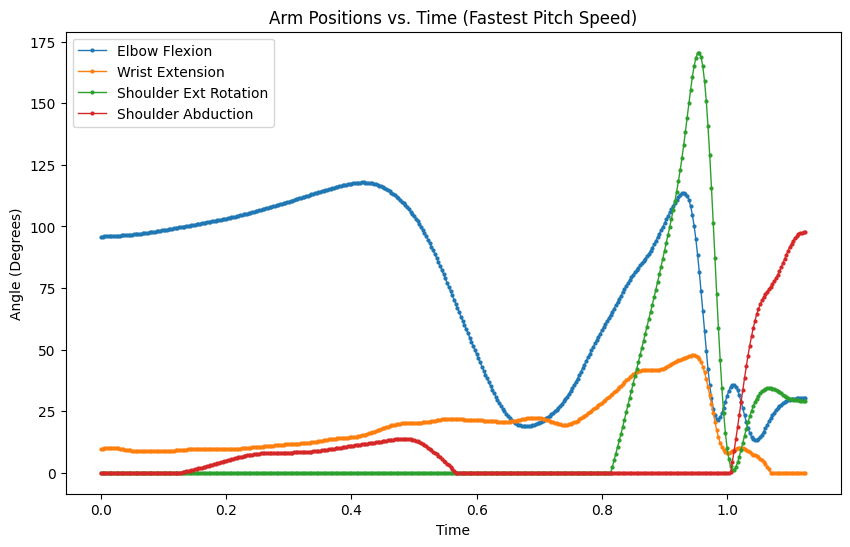

In [20]:
import matplotlib.pyplot as plt

# Extract the data from highest_pitch_speed_data
time = highest_pitch_speed_data['time']
elbow_flexion = highest_pitch_speed_data['elbow_flexion']
wrist_extension = highest_pitch_speed_data['wrist_extension']
shoulder_ext_rotation = highest_pitch_speed_data['shoulder_ext_rotation']
shoulder_abduction = highest_pitch_speed_data['shoulder_abduction']

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the values against time
plt.plot(time, elbow_flexion, label='Elbow Flexion', marker='o', linewidth=1, markersize=2)
plt.plot(time, wrist_extension, label='Wrist Extension', marker='o', linewidth=1, markersize=2)
plt.plot(time, shoulder_ext_rotation, label='Shoulder Ext Rotation', marker='o', linewidth=1, markersize=2)
plt.plot(time, shoulder_abduction, label='Shoulder Abduction', marker='o', linewidth=1, markersize=2)

# Add labels and legend
plt.title('Arm Positions vs. Time (Fastest Pitch Speed)')
plt.xlabel('Time')
plt.ylabel('Angle (Degrees)')
plt.legend()

# Show the plot
plt.show()


In [22]:
#Lower body 






In [19]:
import pandas as pd

# Create a new DataFrame with the desired transformations
new_lower_data = pd.DataFrame()

# Extract the corresponding time values
new_lower_data['time'] = merged_data['time']
new_lower_data['pitch_speed_mph'] = merged_data['pitch_speed_mph']

# Calculate and rename the columns as requested
new_lower_data['torso_extension'] = merged_data['torso_angle_x'].apply(lambda x: abs(min(0, x)))
new_lower_data['pelvis_axial_rotation_towards_home'] = merged_data['pelvis_angle_z'].apply(lambda x: max(0, x))
new_lower_data['torso_pelvis_extension'] = merged_data['torso_pelvis_angle_x'].apply(lambda x: max(0, x))
new_lower_data['pelvis_posterior_tilt'] = merged_data['pelvis_angle_x'].apply(lambda x: abs(min(0, x)))

# Now, "new_data" contains the transformed and renamed columns
# You can use this DataFrame for further analysis
new_lower_data


,time,pitch_speed_mph,torso_extension,pelvis_axial_rotation_towards_home,torso_pelvis_extension,pelvis_posterior_tilt
0,0.0000,90.4,0.0,27.7062,4.5245,0.0
1,0.0028,90.4,0.0,27.6480,4.5859,0.0
2,0.0056,90.4,0.0,27.5880,4.6484,0.0
3,0.0083,90.4,0.0,27.5267,4.7113,0.0
4,0.0111,90.4,0.0,27.4647,4.7737,0.0
...,...,...,...,...,...,...
247704,1.7528,81.2,0.0,118.5531,4.2283,0.0
247705,1.7556,81.2,0.0,118.5953,4.2786,0.0
247706,1.7583,81.2,0.0,118.6228,4.3129,0.0
247707,1.7611,81.2,0.0,118.6395,4.3343,0.0


In [9]:
# Find the maximum pitch speed in the DataFrame
max_pitch_speed = new_lower_data['pitch_speed_mph'].max()

# Create a new DataFrame with rows where pitch_speed_mph is the highest
highest_pitch_speed_lower_data = new_lower_data[new_lower_data['pitch_speed_mph'] == max_pitch_speed]

# Display the DataFrame with the rows where pitch_speed_mph is the highest
highest_pitch_speed_lower_data.head(6)

,time,pitch_speed_mph,torso_extension,pelvis_axial_rotation_towards_home,torso_pelvis_extension,pelvis_posterior_tilt
138222,0.0000,94.4,0.0,21.4235,0.0,0.0
138223,0.0028,94.4,0.0,21.0779,0.0,0.0
138224,0.0056,94.4,0.0,20.7227,0.0,0.0
138225,0.0083,94.4,0.0,20.3621,0.0,0.0
138226,0.0111,94.4,0.0,19.9994,0.0,0.0
138227,0.0139,94.4,0.0,19.6369,0.0,0.0


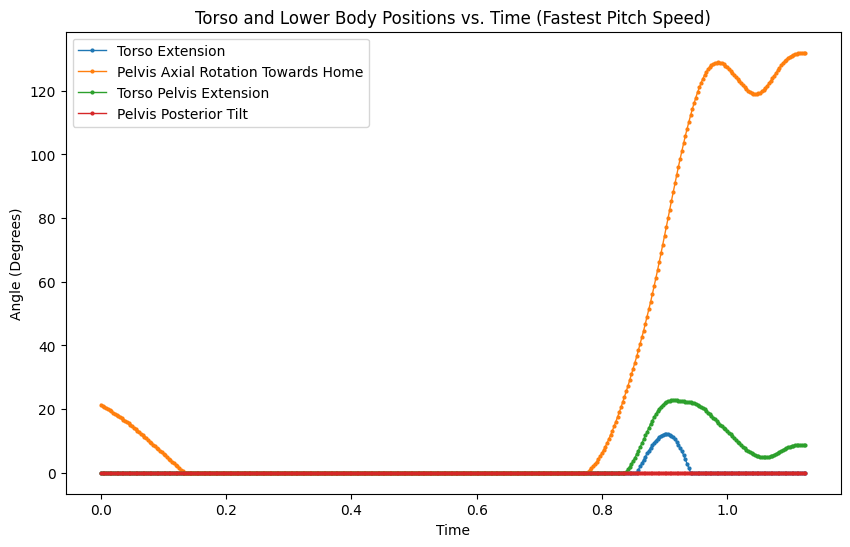

In [21]:
import matplotlib.pyplot as plt

# Extract the data from highest_pitch_speed_data
time = highest_pitch_speed_lower_data['time']
torso_extension = highest_pitch_speed_lower_data['torso_extension']
pelvis_axial_rotation_towards_home = highest_pitch_speed_lower_data['pelvis_axial_rotation_towards_home']
torso_pelvis_extension = highest_pitch_speed_lower_data['torso_pelvis_extension']
pelvis_posterior_tilt = highest_pitch_speed_lower_data['pelvis_posterior_tilt']

# Create a plot
plt.figure(figsize=(10, 6))

# Plot the values against time
plt.plot(time, torso_extension, label='Torso Extension', marker='o', linewidth=1, markersize=2)
plt.plot(time, pelvis_axial_rotation_towards_home, label='Pelvis Axial Rotation Towards Home', marker='o', linewidth=1, markersize=2)
plt.plot(time, torso_pelvis_extension, label='Torso Pelvis Extension', marker='o', linewidth=1, markersize=2)
plt.plot(time, pelvis_posterior_tilt, label='Pelvis Posterior Tilt', marker='o', linewidth=1, markersize=2)

# Add labels and legend
plt.title('Torso and Lower Body Positions vs. Time (Fastest Pitch Speed)')
plt.xlabel('Time')
plt.ylabel('Angle (Degrees)')
plt.legend()

# Show the plot
plt.show()
